## IS453 Financial Analytics
## Week 01 - Time Series Data

### Read stock prices as a pandas dataframe

**API to read historical price data from Yahoo Finance**<BR>
https://pypi.org/project/yfinance/

In [3]:
# uncomment below to install yfinance. Need to use older version, newer verisons have issues.
!pip install yfinance==0.2.31

In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Part 1 - retreive data

Measure from one end-of-year close to another end-of-year close to capture one year's worth of data

**Note:**

The end date for yfinance is exclusive, so we specify the end date for retreiving data as '2022-01-01'<BR>
If we specified it as '2021-12-31' only data up through 30 December would be retreived.



In [5]:
# specify the symbol to read
tickers = ['AAPL']

# specify the time period - 1 year
start_date = '2020-12-31'
end_date = '2022-01-01'

# download the stock price data
stocks_df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


### Part 2 - explore basic dataframe methods


In [6]:
# look at the starting rows of the data structure
stocks_df.head() # returns first 5 rows if number is not specified 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,129.751587,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.544205,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.108765,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.796432,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.020767,109578200


In [7]:
# check the last rows to ensure data covers entire year 
stocks_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-30,179.470001,180.570007,178.089996,178.199997,175.328018,59773000
2021-12-31,178.089996,179.229996,177.259995,177.570007,174.708160,64062300


In [8]:
# check how many rows and columns
stocks_df.shape

# if just want row value 
# stocks_df.shape[0]

(253, 6)

In [9]:
# check data counts, types, etc
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-31 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [10]:
# check to see if there are any missing values
stocks_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Ex Q1. Examine data**

- How many data rows are there for 2021?
- Why is it less than 365?</font>

Your answer here

my answer 

252 (there is one day for 2020 in the rows stated above)
due to weekends and holidays 

In [11]:
stocks_df.loc['2021-01-01':'2021-12-31',:].shape[0]

252

### Part 3 - accessing row and column data

In [12]:
# what type is the index of the dataframe?
stocks_df.index

DatetimeIndex(['2020-12-31', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

***Select rows using iloc***

In [13]:
# use iloc to access rows by integer index number
# filter for the first 20 days of the year (~1 month)
# 1 since the first day is for the previous year, so start from index 1 

stocks_df.iloc[1:20]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.544205,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.108765,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.796432,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.020767,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.125748,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.123741,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,125.947731,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,127.991432,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,126.055283,90221800


In [14]:
stocks_df.iloc[0:2] # [inclusive, exclusive]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,129.751587,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.544205,143301900


In [15]:
stocks_df.iloc[1,2] # row 1, col 2

126.76000213623047

In [16]:
# use .loc to filter rows based on index labels
# filter for the first quarter - Q1
filter_data = stocks_df.loc['2021-01-01' : '2021-03-31']
filter_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.544205,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.108765,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.796432,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.020767,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.125748,105158200
...,...,...,...,...,...,...
2021-03-25,119.540001,121.660004,119.000000,120.589996,118.095734,98844700
2021-03-26,120.349998,121.480003,118.919998,121.209999,118.702904,94071200
2021-03-29,121.650002,122.580002,120.730003,121.389999,118.879189,80819200


In [17]:
# access the 5th column by index
col1 = stocks_df.iloc[ : , 4] # : returns all [row,col]
col1

Date
2020-12-31    129.751587
2021-01-04    126.544205
2021-01-05    128.108765
2021-01-06    123.796432
2021-01-07    128.020767
                 ...    
2021-12-27    177.423676
2021-12-28    176.400436
2021-12-29    176.488968
2021-12-30    175.328018
2021-12-31    174.708160
Name: Adj Close, Length: 253, dtype: float64

***Select specific row and column values using iloc***

In [18]:
# for the first three rows, select the 4th and 5th columns of the by index
col2 = stocks_df.iloc[ 0:3 , [4,5]]
col2

,Adj Close,Volume
Date,,
2020-12-31,129.751587,99116600
2021-01-04,126.544205,143301900
2021-01-05,128.108765,97664900


In [19]:
col2 = stocks_df.iloc[ 0:3 , 4:5] # this gives a different output since a:b is slice which follows [inclusive, exclusive], while [a,b] explicitly selects cols with index a and b
col2

,Adj Close
Date,
2020-12-31,129.751587
2021-01-04,126.544205
2021-01-05,128.108765


In [20]:
col2 = stocks_df.iloc[ 0:3 , [3,4,5]]
col2

,Close,Adj Close,Volume
Date,,,
2020-12-31,132.690002,129.751587,99116600
2021-01-04,129.410004,126.544205,143301900
2021-01-05,131.009995,128.108765,97664900


***Select rows using loc***

In [21]:
# access the rows by date range
col3 = stocks_df.loc[ '2021-01-29' : '2021-02-02' , ]
col3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,135.830002,136.740005,130.210007,131.960007,129.037766,177523800
2021-02-01,133.750000,135.380005,130.929993,134.139999,131.169495,106239800
2021-02-02,135.729996,136.309998,134.610001,134.990005,132.000656,83305400


***Select columns using loc***

In [22]:
# access the column by name
col4 = stocks_df.loc[:,'Adj Close']
col4

# can also use brackets without loc or row specification
# col4 = stocks_df['Adj Close']
# col4

Date
2020-12-31    129.751587
2021-01-04    126.544205
2021-01-05    128.108765
2021-01-06    123.796432
2021-01-07    128.020767
                 ...    
2021-12-27    177.423676
2021-12-28    176.400436
2021-12-29    176.488968
2021-12-30    175.328018
2021-12-31    174.708160
Name: Adj Close, Length: 253, dtype: float64

In [23]:
# access multiple columns by name
col5 = stocks_df.loc[:,['Adj Close','Volume']]
col5

,Adj Close,Volume
Date,,
2020-12-31,129.751587,99116600
2021-01-04,126.544205,143301900
2021-01-05,128.108765,97664900
2021-01-06,123.796432,155088000
2021-01-07,128.020767,109578200
...,...,...
2021-12-27,177.423676,74919600
2021-12-28,176.400436,79144300
2021-12-29,176.488968,62348900


***Select columns using [[]]***

Double brackets can be used to select one or multiple columns by name

In [24]:
# access the column by name with [[]]
col6 = stocks_df[['Adj Close']] # this always returns a dataframe
col6

,Adj Close
Date,
2020-12-31,129.751587
2021-01-04,126.544205
2021-01-05,128.108765
2021-01-06,123.796432
2021-01-07,128.020767
...,...
2021-12-27,177.423676
2021-12-28,176.400436
2021-12-29,176.488968


**Ex Q2. Compare return types of extracted columns**

- For the resulting values of col1 through col6 above, which can you use the code print(colX['Adj Close'])? Which cannot? Why?<BR>E.g. replace in for col1: try "print(col1['Adj Close'])" <BR><BR>
*Hint: Check the type() of the dataframes*

In [25]:
# your code here
# print(col1['Adj Close']) #cannot
# print(col2['Adj Close']) #can
# print(col3['Adj Close']) #can
# print(col4['Adj Close']) #cannot
# print(col5['Adj Close']) #can
print(col6['Adj Close']) #can
print(type(col1))
print(type(col2))
print(type(col3))
print(type(col4))
print(type(col5))
print(type(col6))


Date
2020-12-31    129.751587
2021-01-04    126.544205
2021-01-05    128.108765
2021-01-06    123.796432
2021-01-07    128.020767
                 ...    
2021-12-27    177.423676
2021-12-28    176.400436
2021-12-29    176.488968
2021-12-30    175.328018
2021-12-31    174.708160
Name: Adj Close, Length: 253, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Your answer here

it does not work on type Series 
Series does not have headers - no name for us to reference 

if returning one column - it will return a series
if returns more than 1 col - will return a dataframe 

to avoid this, use double brackets 

In [26]:
col4 = stocks_df.loc[:,['Adj Close']] #df[[columns]] always returns a dataframe
# col4
print(col4['Adj Close']) #this works now 


Date
2020-12-31    129.751587
2021-01-04    126.544205
2021-01-05    128.108765
2021-01-06    123.796432
2021-01-07    128.020767
                 ...    
2021-12-27    177.423676
2021-12-28    176.400436
2021-12-29    176.488968
2021-12-30    175.328018
2021-12-31    174.708160
Name: Adj Close, Length: 253, dtype: float64


### Part 4 - manipulating and analysing column data

NOTE: Use copy() to make sure a new dataframe aapl_prices() is created in memory. <BR>
copy() may not always be required, but helps avoid getting a SettingWithCopyWarning when adding/editing values in the DF.

In [27]:
# create a copy of one column from the dataframe
aapl_prices_copy = stocks_df[['Adj Close']].copy() 
aapl_prices_copy.head()

,Adj Close
Date,
2020-12-31,129.751587
2021-01-04,126.544205
2021-01-05,128.108765
2021-01-06,123.796432
2021-01-07,128.020767


***Rename the column to match the stock ticker***

In [28]:
# rename the column
aapl_prices_copy.rename(columns= {'Adj Close' : 'AAPL'} , inplace= 'True')
aapl_prices_copy.head()

,AAPL
Date,
2020-12-31,129.751587
2021-01-04,126.544205
2021-01-05,128.108765
2021-01-06,123.796432
2021-01-07,128.020767


***Create a column with derivative values***

In [29]:
# add a calculated price column to the df
aapl_prices_copy['half_price'] = aapl_prices_copy['AAPL']/2
aapl_prices_copy.head()


,AAPL,half_price
Date,,
2020-12-31,129.751587,64.875793
2021-01-04,126.544205,63.272102
2021-01-05,128.108765,64.054382
2021-01-06,123.796432,61.898216
2021-01-07,128.020767,64.010384


**Ex Q3. Change the name and formula  the calculated column**

- Rename the 'half_price' column to be 'quarter_price' and recalculate the column values to be 1/4 the APPL column values<BR>
*Hint: you can directly assign the new values to replace existing column values*

- Copy the column headings and the first two rows of your resulting dataframe to padlet

In [30]:
# your code here
aapl_prices_copy['quarter_price'] = aapl_prices_copy['AAPL']/4
aapl_prices_copy.head()

,AAPL,half_price,quarter_price
Date,,,
2020-12-31,129.751587,64.875793,32.437897
2021-01-04,126.544205,63.272102,31.636051
2021-01-05,128.108765,64.054382,32.027191
2021-01-06,123.796432,61.898216,30.949108
2021-01-07,128.020767,64.010384,32.005192


In [31]:
# aapl_prices_copy.rename(columns={'half_price':'quarter_price'}, inplace=True)
# aapl_prices_copy['quarter_price'] = aapl_prices_copy['AAPL']/4
# aapl_prices_copy.head()

***Plot the price time series***

reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html


<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

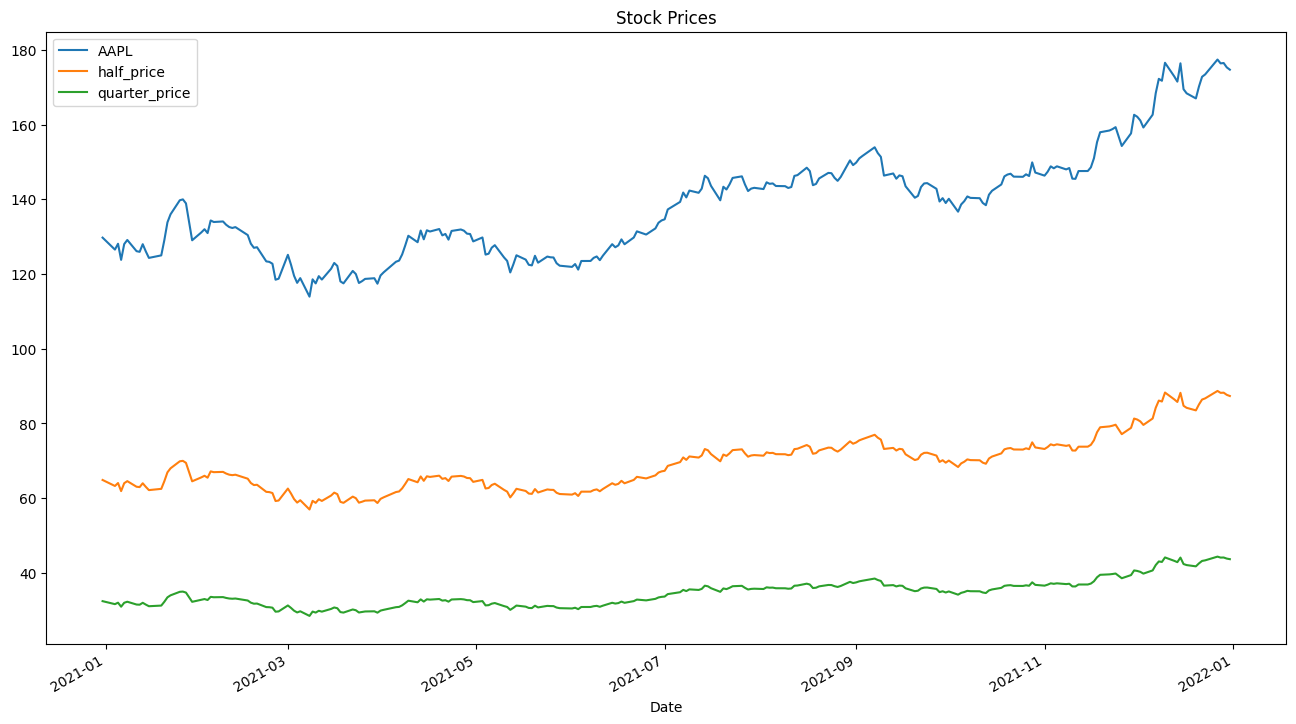

In [32]:
# plot the time series
aapl_prices_copy.plot(figsize=(16,9), title = 'Stock Prices')

# DYI

**DYI Q1:**

From aapl_prices find the average 'Adj Close' prices rounded to two decimal places for AAPL in the last quarter of 2021.

*Hint: be sure to start with the price from the close of the previous quarter*

In [33]:
# your code here
aapl_prices_copy_last_quarter = stocks_df.loc['09-30-2021':'01-01-2022', ['Adj Close']].copy()
aapl_prices_copy_last_quarter.mean().round(2)


Adj Close    155.16
dtype: float64

Your answer

**DYI Q2:** 

Retreive the same date range of 2021 data as before for both 'AAPL' and 'SPY' and compare their Adj Close prices on the same chart.

Note : SPY is a fund(ETF) that tracks the Standard & Poor’s 500 Index which is comprised of 500 large-cap U.S. stocks.

In [34]:
# your code here

tickers = ['AAPL', 'SPY']
# specify the time period - 1 year
start_date = '2021-01-01'
end_date = '2022-01-01'

# download the stock price data
stocks_df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  2 of 2 completed


In [35]:
stocks_df.loc[:,['Adj Close']].head()

Adj Close            
                  AAPL         SPY
Date                              
2021-01-04  126.544220  348.299408
2021-01-05  128.108765  350.698273
2021-01-06  123.796448  352.794891
2021-01-07  128.020752  358.036560
2021-01-08  129.125793  360.076599

<Axes: title={'center': 'Adj Close'}, xlabel='Date'>

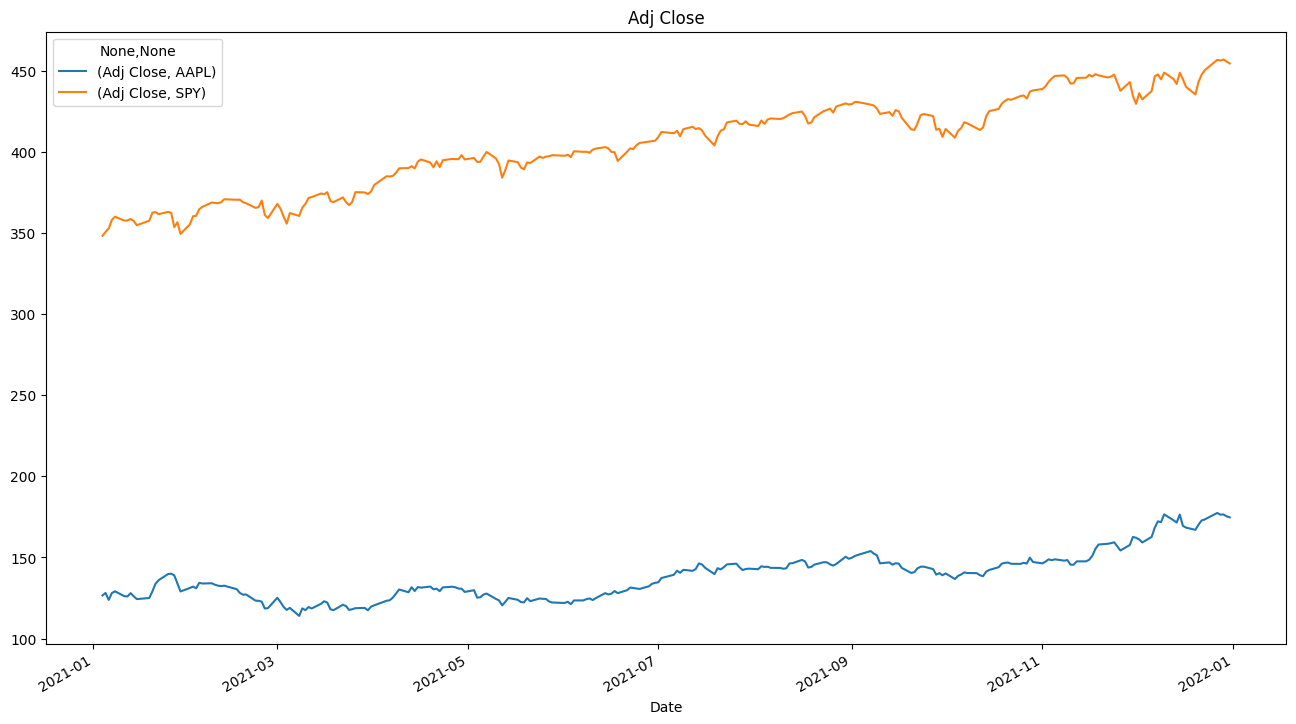

In [39]:
stocks_df.loc[:,['Adj Close']].plot(figsize=(16,9), title = 'Adj Close')

**DYI Q3:**

In the aapl_prices_copy dataframe, add a new calculated column.

- Create a new column called 'daily_returns' that contains the percent return of daily price movements.<br>
- Use the pct_change() method from pandas. Apply this method to the prices column 'AAPL'.

*Hint: The first row value of daily_returns should be NaN*

In [37]:
# your code here
aapl_prices_copy['daily_returns'] = aapl_prices_copy['AAPL'].pct_change()
aapl_prices_copy


,AAPL,half_price,quarter_price,daily_returns
Date,,,,
2020-12-31,129.751587,64.875793,32.437897,NaN
2021-01-04,126.544205,63.272102,31.636051,-0.024719
2021-01-05,128.108765,64.054382,32.027191,0.012364
2021-01-06,123.796432,61.898216,30.949108,-0.033661
2021-01-07,128.020767,64.010384,32.005192,0.034123
...,...,...,...,...
2021-12-27,177.423676,88.711838,44.355919,0.022975
2021-12-28,176.400436,88.200218,44.100109,-0.005767
2021-12-29,176.488968,88.244484,44.122242,0.000502


**DYI Q4:**

In the data retreived, prices are missing for 1-3 Jan. <BR>Is there a problem with yfinance or is the data correct? Are the 2nd and 3rd of January weekend days?<BR>
Let's find out.

Use Generative AI to help you write the Python code to list the day of week associated with each row in the dataframe.<br> 
Your ouput should look like this:<br>
Date<br>
2021-12-27       Monday<br>
2021-12-28      Tuesday<br>
2021-12-29    Wednesday<br>
2021-12-30     Thursday<br>
2021-12-31       Friday<br>

Then check which day of the week the 4th of January occurred on to determine which days the 2nd and 3rd were.

In [38]:
# your successful GenAI prompts here:

% you are an assistant to a Python software developer
%	AAPL	half_price	quarter_price	daily_returns
% Date				
% 2020-12-31	129.751572	64.875786	32.437893	NaN
% 2021-01-04	126.544212	63.272106	31.636053	-0.024719
% 2021-01-05	128.108780	64.054390	32.027195	0.012364
% in the data retrieved, prices are missing for 1-3 January. 
% Help me to write a code to list the day of the week associated with each row in the dataframe like this
% Date
% 2021-12-31 Friday
% Check the day of the week of 4th January 2021 to determine which days the 2nd and 3rd were.

UsageError: Line magic function `%` not found.


In [119]:
import pandas as pd

# Sample data
data = {
    "AAPL": [129.751572, 126.544212, 128.108780],
    "half_price": [64.875786, 63.272106, 64.054390],
    "quarter_price": [32.437893, 31.636053, 32.027195],
    "daily_returns": [None, -0.024719, 0.012364]
}
index = ["2020-12-31", "2021-01-04", "2021-01-05"]

# Create DataFrame
df = pd.DataFrame(data, index=pd.to_datetime(index))

# Generate a complete range of dates
full_date_range = pd.date_range(start="2020-12-31", end="2021-01-05")

# Reindex to include all dates
df = df.reindex(full_date_range)

# Add the day of the week
df["day_of_week"] = df.index.day_name()

# Print the missing dates with their corresponding days of the week
print(df[["day_of_week"]])


           day_of_week
2020-12-31    Thursday
2021-01-01      Friday
2021-01-02    Saturday
2021-01-03      Sunday
2021-01-04      Monday
2021-01-05     Tuesday


Your answer